In [29]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB

warnings.filterwarnings('ignore')

In [30]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [31]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [32]:
digits.target[0]

0

<Figure size 432x288 with 0 Axes>

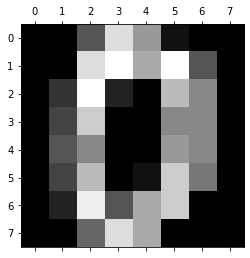

In [33]:
plt.gray()
plt.matshow(digits.images[0])

In [38]:
model_dict={
    'logistic_regression':{
        'model':LogisticRegression(multi_class='auto'),
        'parameters':{
                'C':[1,5,10]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'parameters':{
            'criterion':['gini','entropy']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'parameters':{
            'n_estimators':[1,5,10]
        }
    },
    'svm':{
        'model':SVC(gamma='auto'),
        'parameters':{
            'C':[1,10,20],
            'kernel':['linear','rbf']
        }
    },
    'gaussian_nb':{
        'model':GaussianNB(),
        'parameters':{}
        },
    'multinomial_nb':{
        'model':MultinomialNB(),
        'parameters':{}
        }
    }

In [57]:
scores=[]
for key,value in model_dict.items():
    clf=GridSearchCV(value['model'],value['parameters'],cv=10,return_train_score=False)
    clf.fit(digits.data,digits.target)
    scores.append({
        'model':key,
        'best_score(%)':clf.best_score_*100,
        'best_param':clf.best_params_
        })

In [58]:
score_dataset=pd.DataFrame(scores)
score_dataset

,model,best_score(%),best_param
0,logistic_regression,92.819367,{'C': 1}
1,decision_tree,82.636251,{'criterion': 'gini'}
2,random_forest,92.319677,{'n_estimators': 10}
3,svm,96.048727,"{'C': 1, 'kernel': 'linear'}"
4,gaussian_nb,81.139044,{}
5,multinomial_nb,87.978585,{}
